
# Project: Investigate a Dataset - TMDb Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

Question 1: Which genres are most popular from year to year?

Question 2  What kinds of properties are associated with movies that have high revenues?

Question 3  Is there any relationship between budget and revenue?

Question 4  Are there key words for the movies with the most profit?

Question 5  Does the run time of a movie affects it's popularity?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01  2% |█                               | 307kB 12.6MB/s eta 0:00:01    15% |████▉                           | 1.6MB 27.1MB/s eta 0:00:01    29% |█████████▎                      | 3.0MB 29.9MB/s eta 0:00:01    57% |██████████████████▎             | 6.0MB 30.3MB/s eta 0:00:01    69% |██████████████████████▎         | 7.3MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.2MB/s eta 0:00:01   43% |█████████████▉                  | 5.8MB 29.9MB/s eta 0:00:01    54% |█████████████████▎              | 7.2MB 30.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


## Data Wrangling

First i want to know the number of columns and rows in my data:

In [4]:
df.shape

(10866, 21)

Then i want to know the types of the data i have to classify it wether it is quantitative or categorial data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Then i want to know if i have missing oe repeated values for the data:

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
 

#### First i need to drop down the columns i don't need:

In [8]:
df.drop(['imdb_id','homepage','tagline','overview'], axis=1, inplace=True)

#### Find if there is any duplicated values and drop them:

In [9]:
print(df.duplicated().sum())

1


In [10]:
df.drop_duplicates(inplace=True)

#### Find if there are any missing values in the dataset and drop any missing values:

In [11]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 17 columns):
id                      8666 non-null int64
popularity              8666 non-null float64
budget                  8666 non-null int64
revenue                 8666 non-null int64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
runtime                 8666 non-null int64
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null object
vote_count              8666 non-null int64
vote_average            8666 non-null float64
release_year            8666 non-null int64
budget_adj              8666 non-null float64
revenue_adj             8666 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.2+ MB


#### Here i will convert the cast column to a list of Actor names:

In [14]:
df['cast']=df['cast'].apply(lambda x: x.replace("|", " "))

In [15]:
df['cast']=df['cast'].apply(lambda x: x.split())

#### the same thing will be done for the keywords column:

In [16]:
df['keywords']=df['keywords'].apply(lambda x: x.replace("|", " "))

In [17]:
df['keywords']=df['keywords'].apply(lambda x: x.split())

#### For the genres and production_companies i will only use the first value for simplicity:

In [18]:
df['genres']=df['genres'].apply(lambda x: x.split("|")[0])

In [19]:
df['production_companies']=df['production_companies'].apply(lambda x: x.split("|")[0])

#### converting the release_date to a datetime format

In [20]:
df['release_date']=pd.to_datetime(df['release_date'])

#### i had a problem with old dates for example: 78/5/8 it would change it to 2078-5-8 which is not true so i had to implement a code to fix this.
the source of the code : https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year?answertab=scoredesc#tab-top

In [21]:
from datetime import timedelta, date
col = 'release_date'
df[col] = pd.to_datetime(df[col])
future = df[col] > date(year=2021,month=1,day=1)
df.loc[future, col] -= timedelta(days=365.25*100)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


the code works just fine but i have spent a lot of time searching for this error and i couldn't find an answer and since it is not affecting my code (i think from the results) so i left it as it is.

#### Checking data again:

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,57003.179206,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,86242.565745,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9816.750000,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,54003.000000,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


#### Dropping rows with runtime that are equal to zero because it doesn't make sense with a minimum of 20 minutes

In [23]:
df.drop(df.index[df['runtime'] <= 20], inplace = True)

#### Replacing the zero values in the budget and revenue withe the mean of each of them:

##### I wanted to extract the mean for both the revenue and budget but i had the zero wich messed up the value do i had to extract each on them

###### i will put also a minimun revenue and budget values of 100,000 dollar 
source: https://screenrant.com/best-low-budget-movies-all-time-how-much-cost/

In [24]:
df_budget = df

In [25]:
df_budget.drop(df_budget.index[df_budget['budget'] == 0], inplace = True)

In [26]:
df_budget.budget.mean()

32534008.877676491

In [27]:
df['budget']=df['budget'].replace(range(100001),df_budget.budget.mean())

for revenue

In [28]:
df_revenue = df

In [29]:
df_revenue.drop(df_revenue.index[df_revenue['revenue'] == 0], inplace = True)

In [30]:
df_revenue.revenue.mean()

111440522.94669567

In [31]:
df['revenue']=df['revenue'].replace(range(100001),df_revenue.revenue.mean())

#### The same thing will be done for the budget_adj and revenue_adj:

In [32]:
df_budget_adj = df

In [33]:
df_budget_adj.drop(df_budget_adj.index[df_budget_adj['budget_adj'] == 0], inplace = True)

In [34]:
df_budget_adj.budget_adj.mean()

45387934.809763044

In [35]:
df['budget_adj']=df['budget_adj'].replace(range(100001),df_budget_adj.budget_adj.mean())

for revenue

In [36]:
df_revenue_adj = df

In [37]:
df_revenue_adj.drop(df_revenue_adj.index[df_revenue_adj['revenue_adj'] == 0], inplace = True)

In [38]:
df_revenue_adj.revenue_adj.mean()

142088762.17984915

In [39]:
df['revenue_adj']=df['revenue_adj'].replace(range(100001),df_revenue_adj.revenue_adj.mean())

### Check

In [40]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3677.000000,3677.000000,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3.677000e+03
mean,39224.526244,1.226051,3.847706e+07,1.138342e+08,109.561327,547.702203,6.182758,2001.091923,4.543727e+07,1.423592e+08
std,67249.633137,1.498897,4.248837e+07,1.786013e+08,19.855075,894.954704,0.789610,11.380391,4.516716e+07,2.194281e+08
min,5.000000,0.010335,1.250000e+05,1.009150e+05,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,5470.000000,0.481276,1.050000e+07,1.709245e+07,96.000000,78.000000,5.700000,1995.000000,1.382918e+07,2.052919e+07
50%,11017.000000,0.830597,2.500000e+07,5.229398e+07,106.000000,219.000000,6.200000,2004.000000,3.117003e+07,6.583668e+07
75%,37958.000000,1.411147,5.000000e+07,1.298324e+08,120.000000,596.000000,6.700000,2010.000000,6.216097e+07,1.704399e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 17 columns):
id                      3677 non-null int64
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null int64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(6)
memory usage: 517.1+ KB


In [42]:
df_datecheck=df.query('release_date > "2022-1-1"')

In [43]:
df_datecheck.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [44]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris, Pratt, Bryce, Dallas, Howard, Irrfan, ...",Colin Trevorrow,"[monster, dna, tyrannosaurus, rex, velocirapto...",124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year?

i want to see the popularity of each genre though time

In [45]:
genres_list=df.genres.tolist()
genres_list=set(genres_list)
len(genres_list)

19

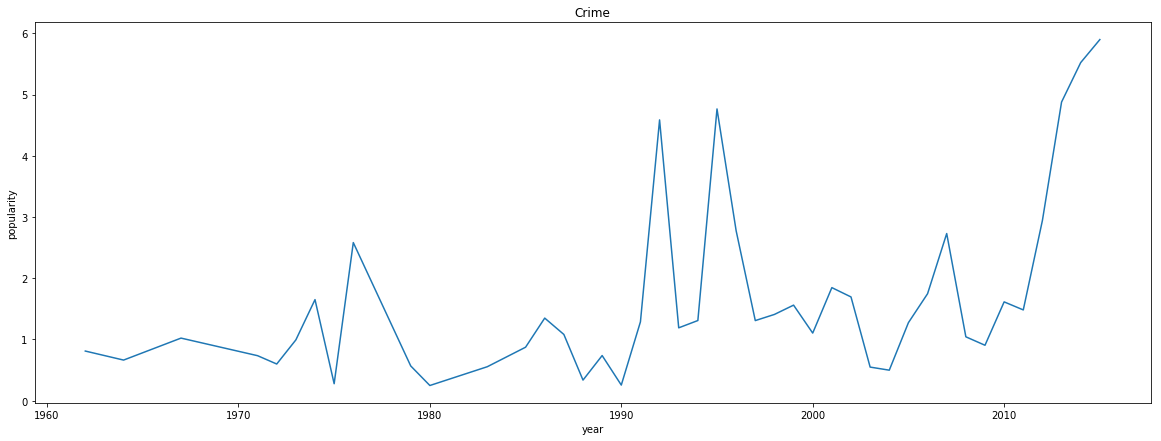

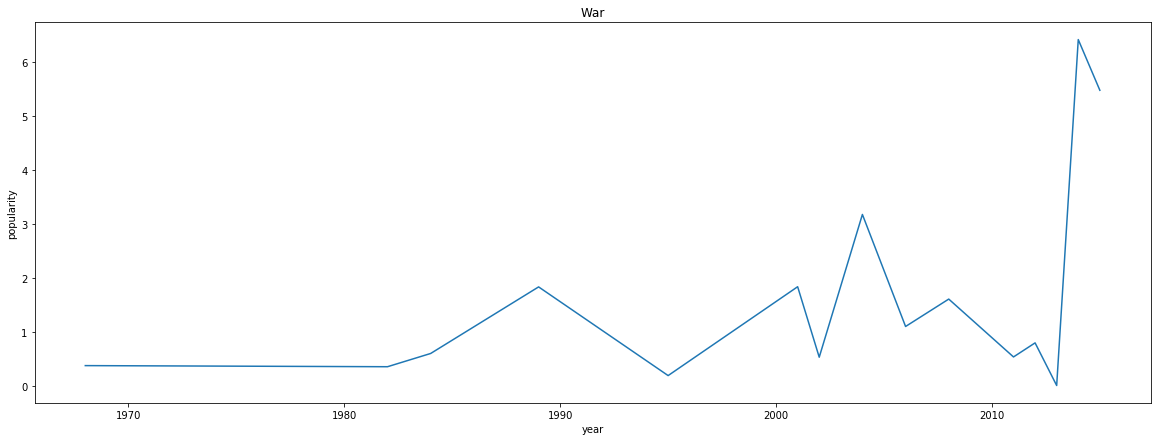

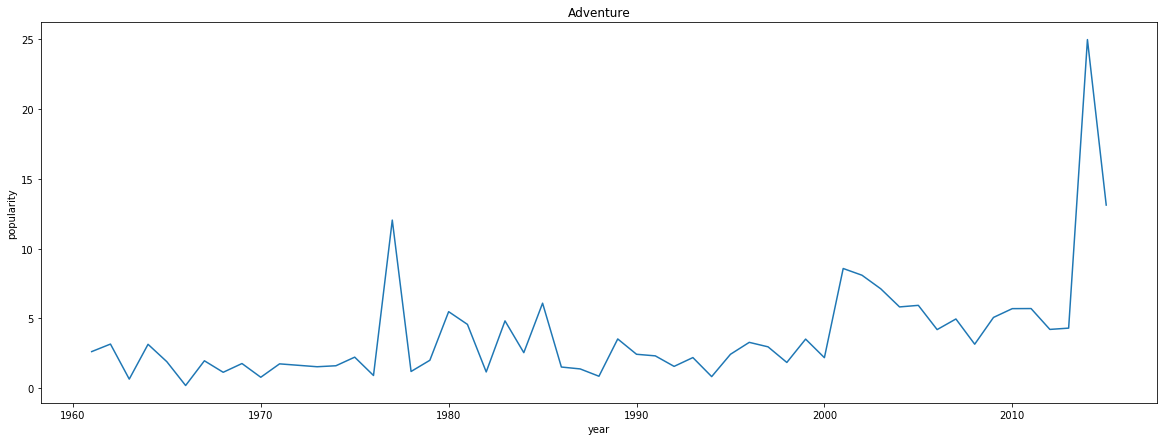

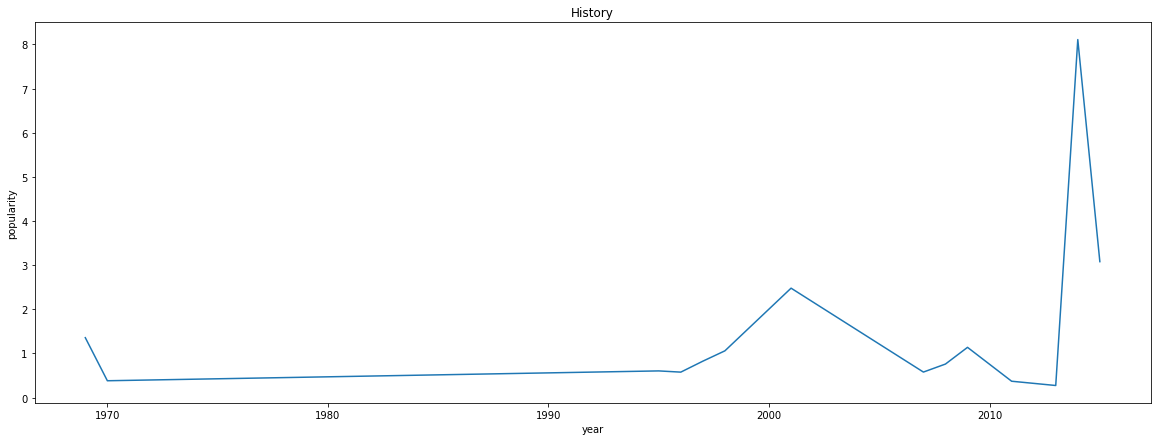

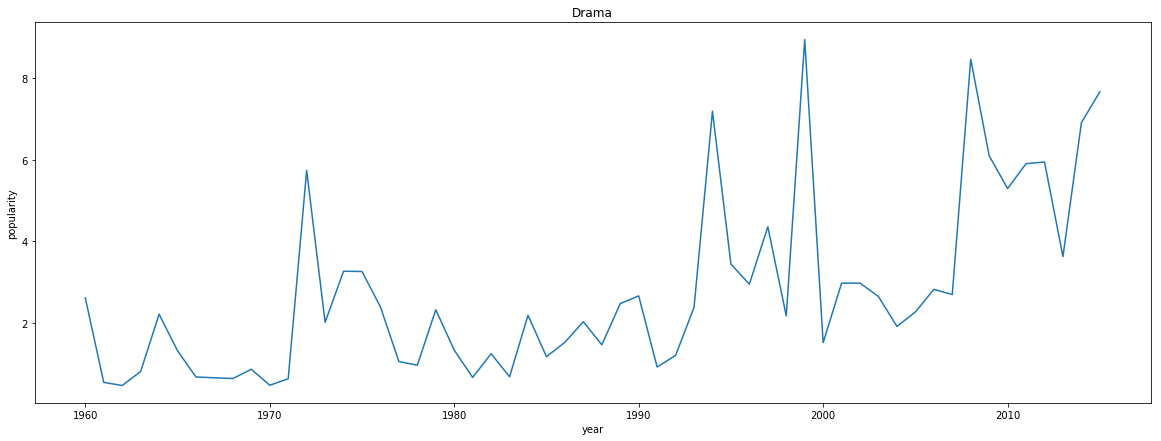

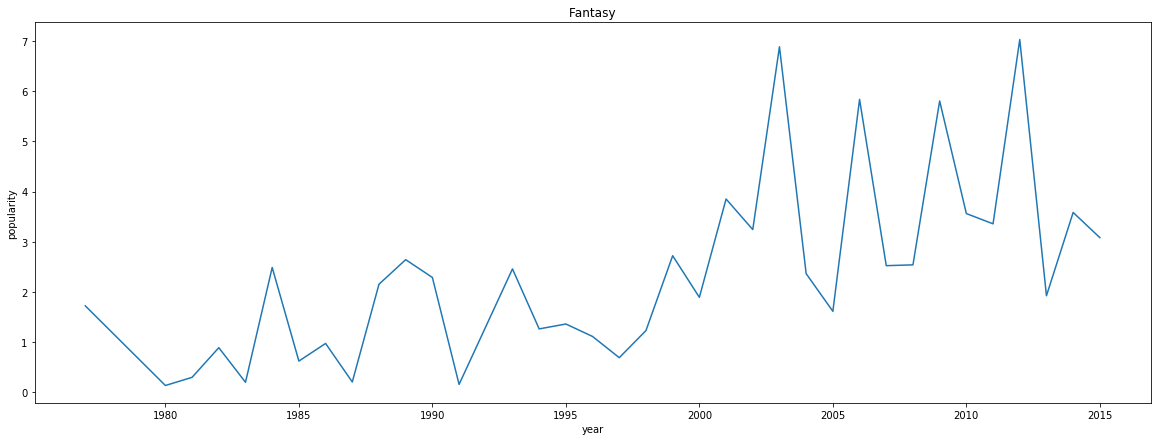

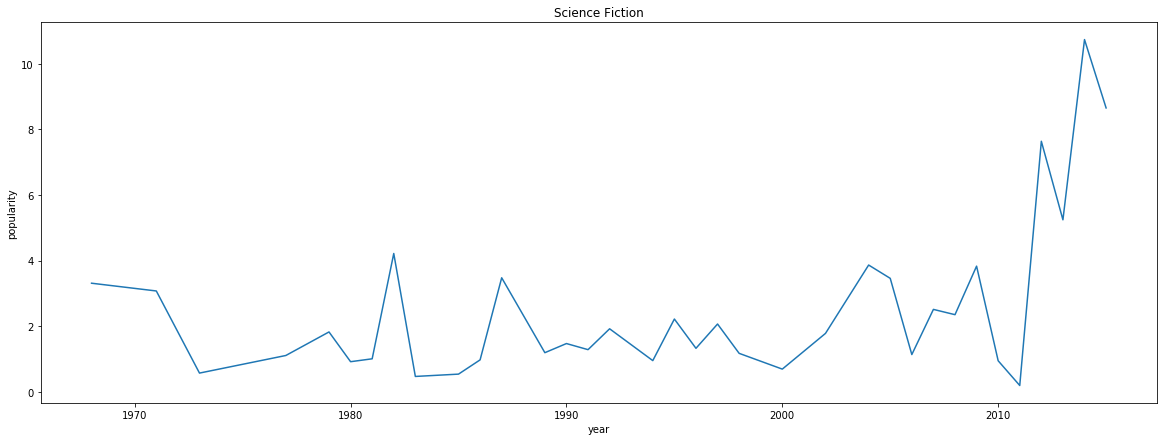

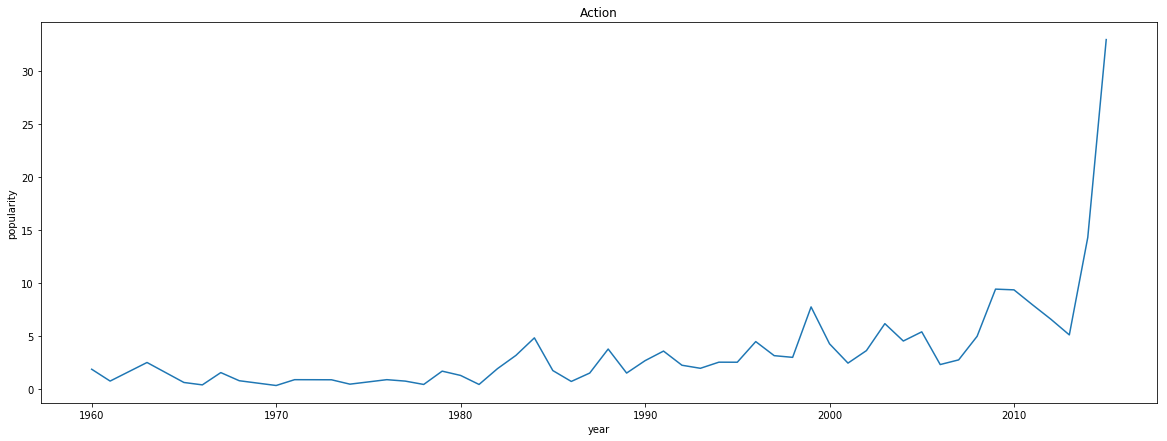

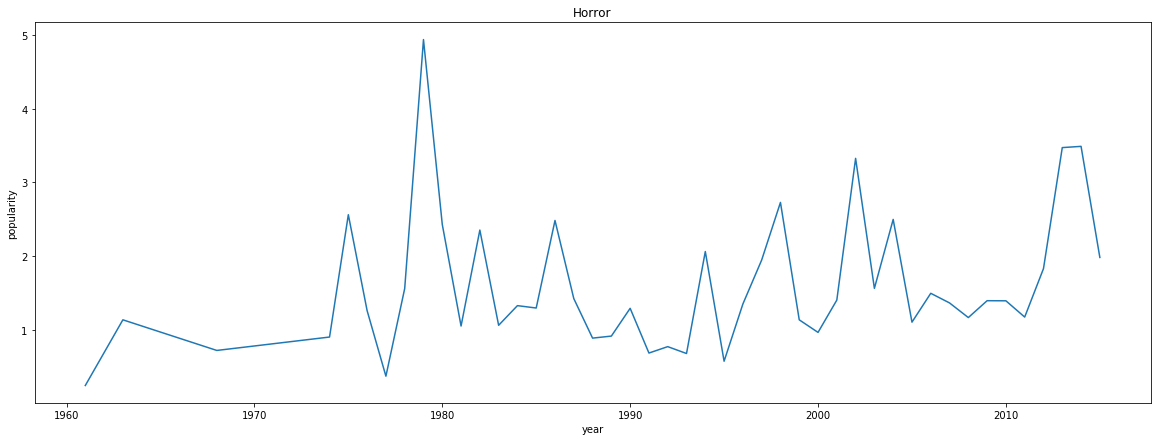

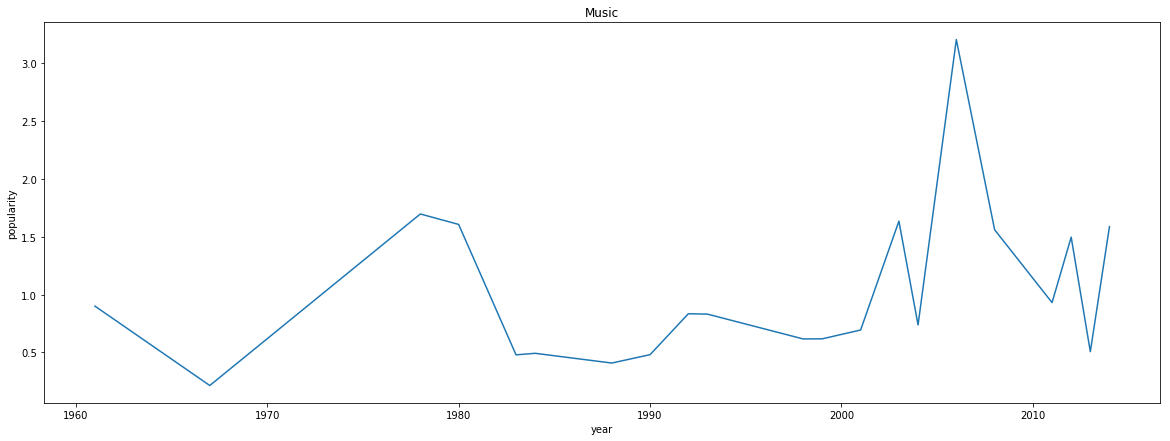

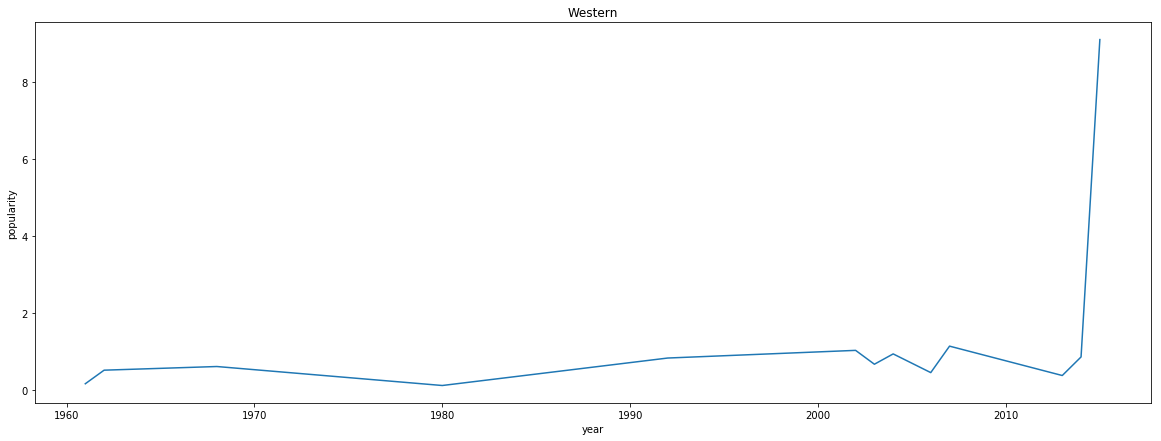

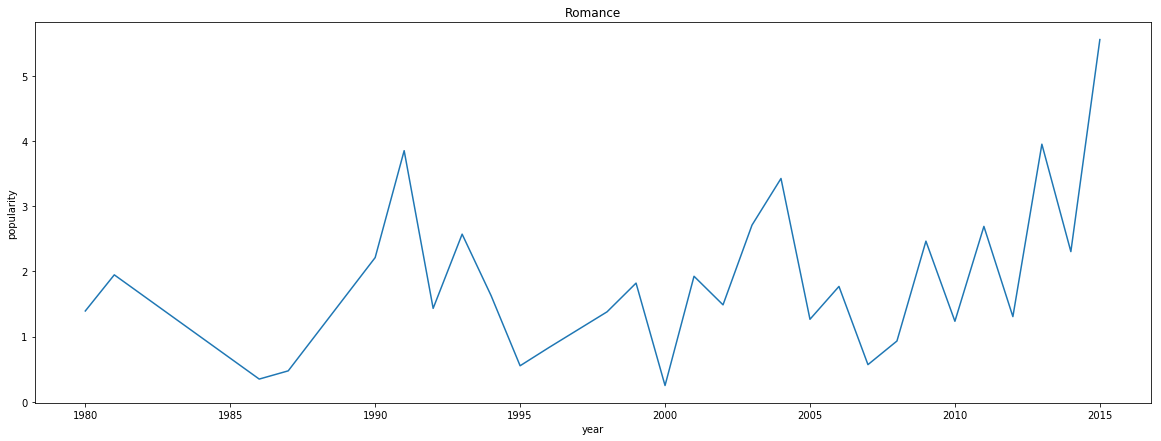

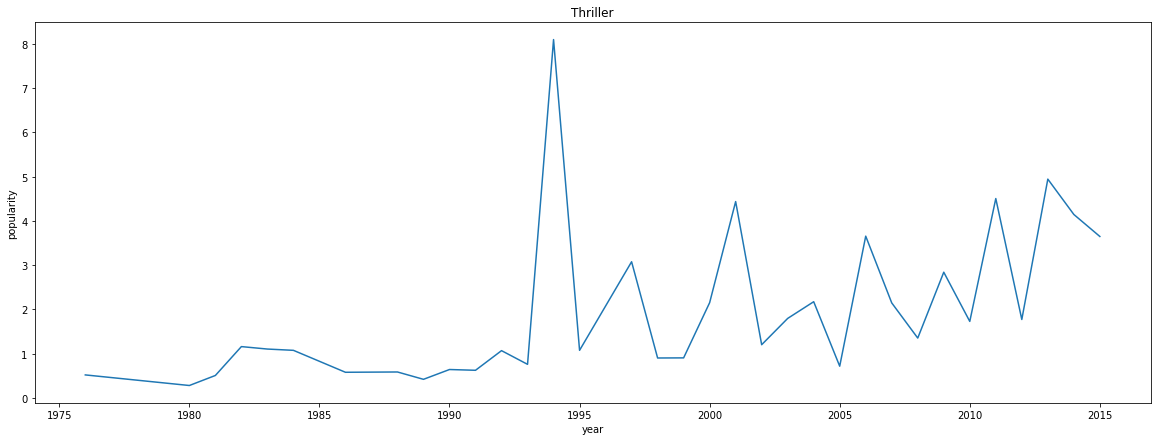

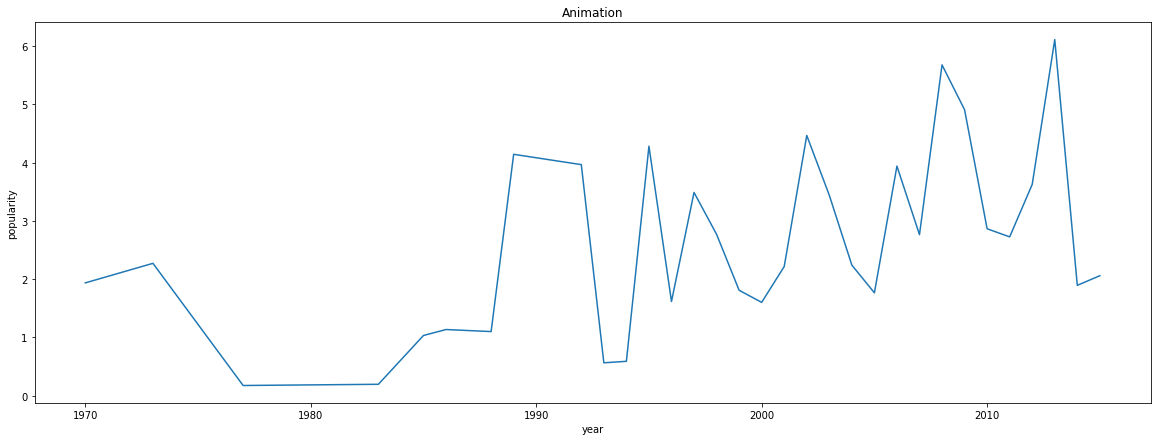

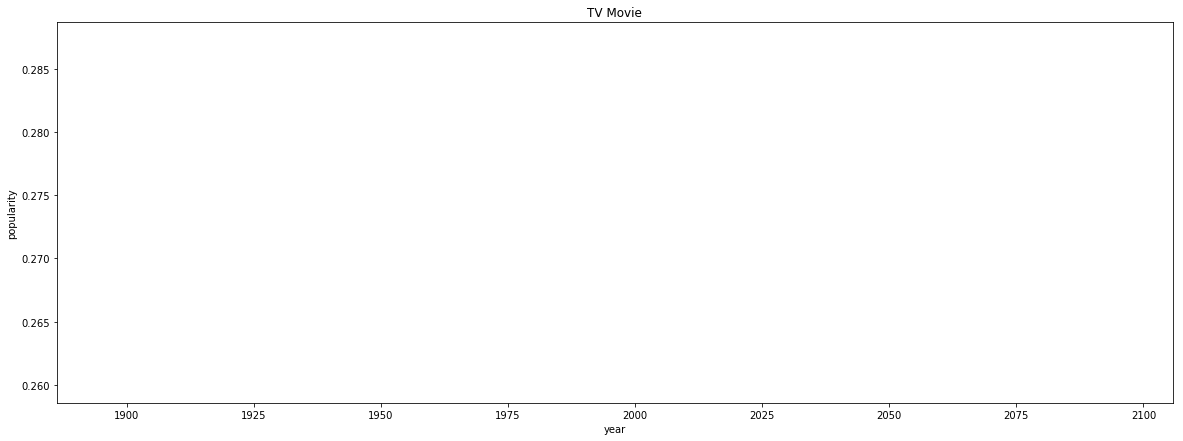

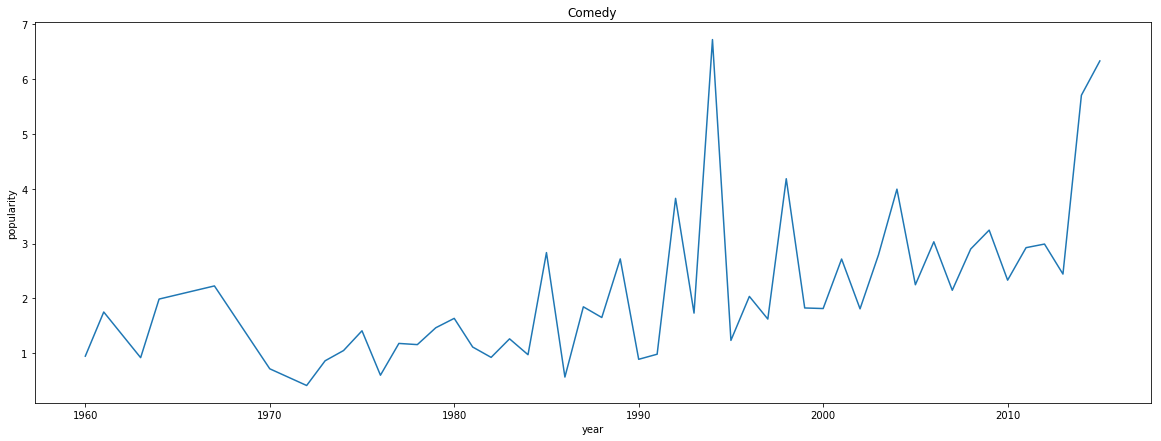

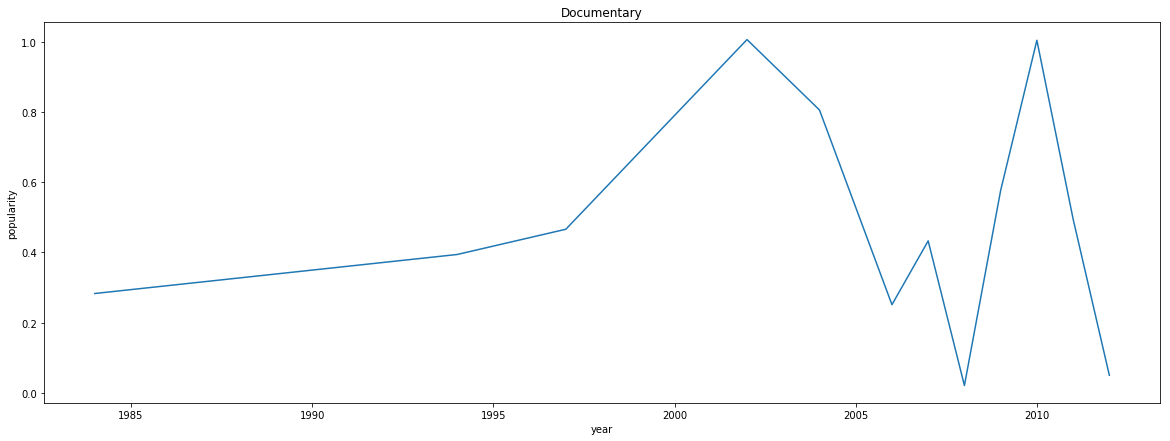

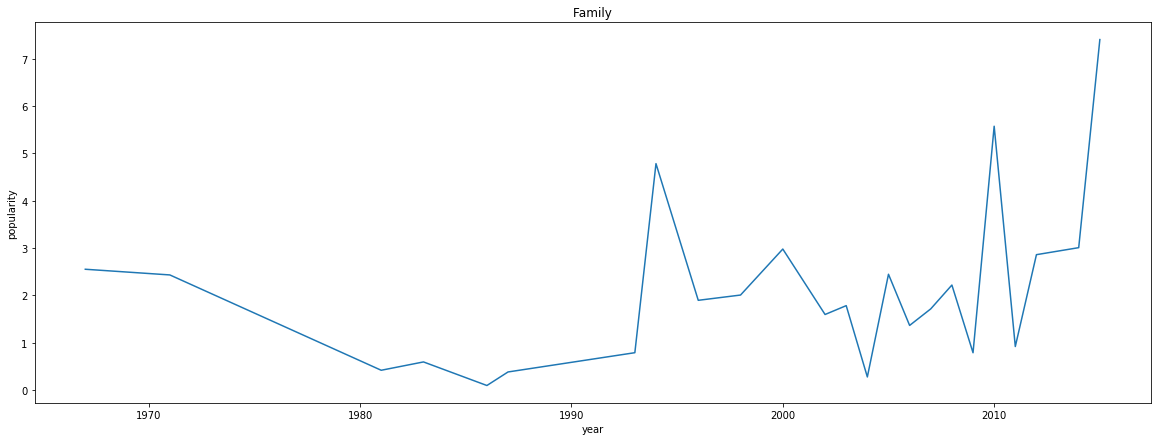

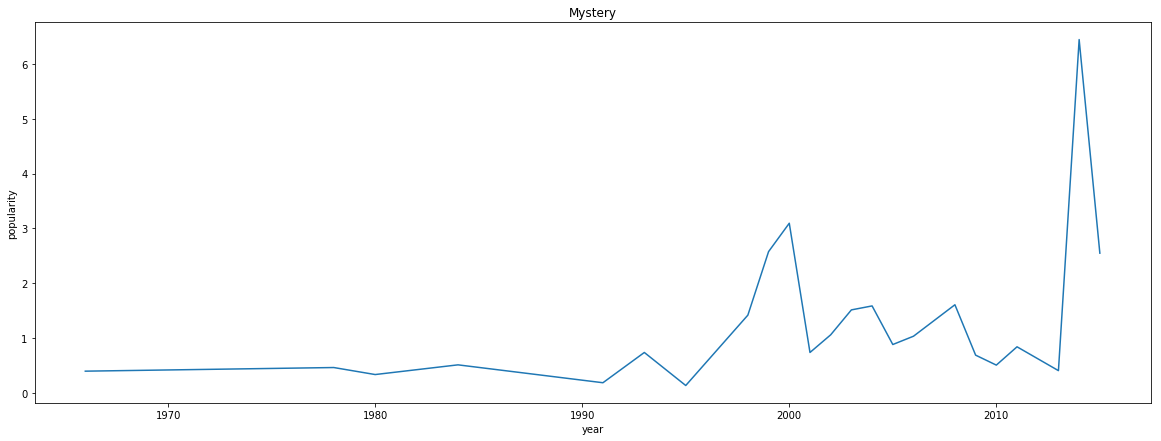

In [46]:
for genre in genres_list:
    plt.subplots(figsize=(20, 7))
    df_new=df[df['genres']==genre]
    plt.plot(df_new.groupby('release_year').popularity.max())
    plt.title(genre)
    plt.xlabel("year")
    plt.ylabel("popularity");


Then i want to see the popularity of each genre in general

Text(0.5,1,'Genres Vs. Popularity')

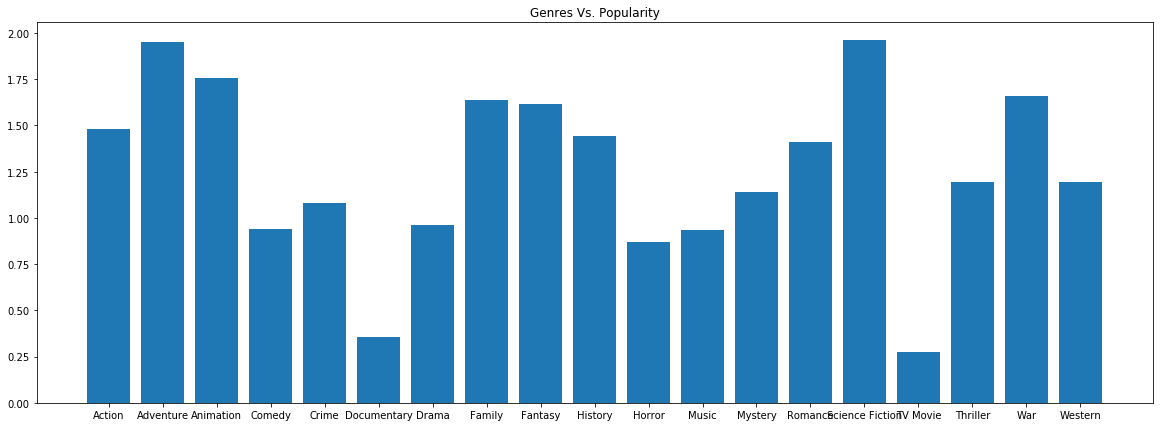

In [47]:
plt.subplots(figsize=(20, 7))
plt.bar(df.groupby('genres').popularity.mean().index,df.groupby('genres').popularity.mean())
plt.title("Genres Vs. Popularity")

#### Conclusion:
we can see that most of the genres have a lillte consistancy through the given years, whilewestern, history, family and war genres started to get popularity after 1990 and TV Movies were never popular.
we can see from the secont set of graphs that adventure and science fiction gained the most popularity and that is true if we compared this result to real life we will find movies like Lord of the rings, Star wars and harry potter are having a huge fan base.

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

In [49]:
df_hr=df.sort_values(by=['revenue'], ascending = False)

In [50]:
df_hr.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,"[Sam, Worthington, Zoe, Saldana, Sigourney, We...",James Cameron,"[culture, clash, future, space, war, space, co...",162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,"[Harrison, Ford, Mark, Hamill, Carrie, Fisher,...",J.J. Abrams,"[android, spaceship, jedi, space, opera, 3d]",136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,"[Kate, Winslet, Leonardo, DiCaprio, Frances, F...",James Cameron,"[shipwreck, iceberg, ship, panic, titanic]",194,Drama,Paramount Pictures,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,"[Robert, Downey, Jr., Chris, Evans, Mark, Ruff...",Joss Whedon,"[new, york, shield, marvel, comic, comic, supe...",143,Science Fiction,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris, Pratt, Bryce, Dallas, Howard, Irrfan, ...",Colin Trevorrow,"[monster, dna, tyrannosaurus, rex, velocirapto...",124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


relation between revenues and movies genre

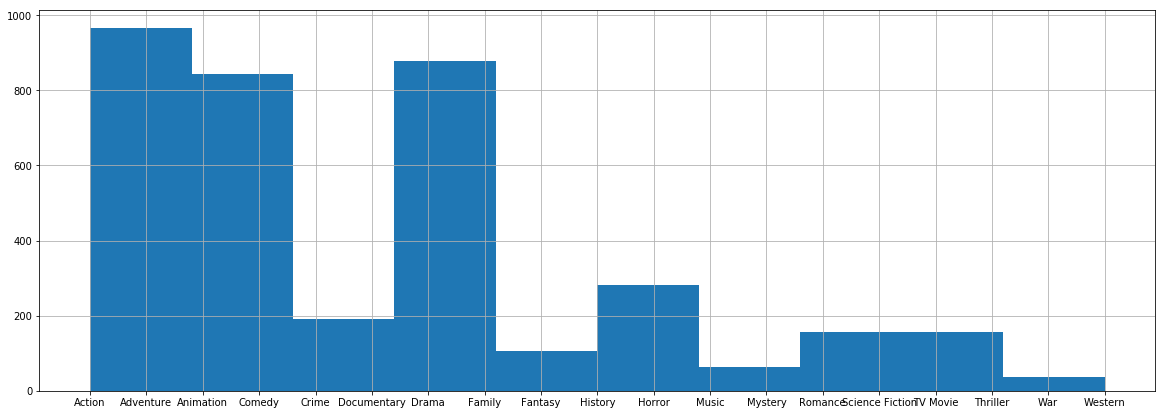

In [51]:
df_hr.genres.hist(figsize=(20,7))

Action and Drama movies have higher revenues

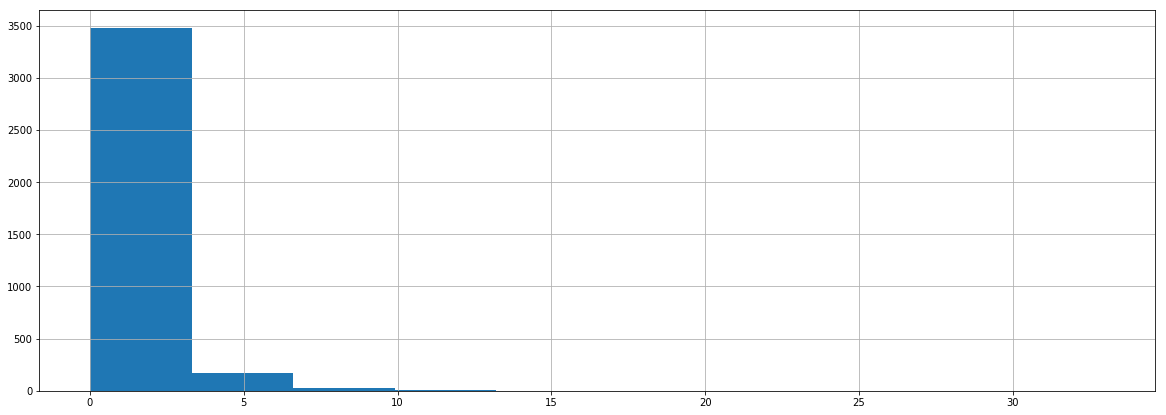

In [52]:
df_hr.popularity.hist(figsize=(20,7))

Popular movies have higher revenues (naturally)

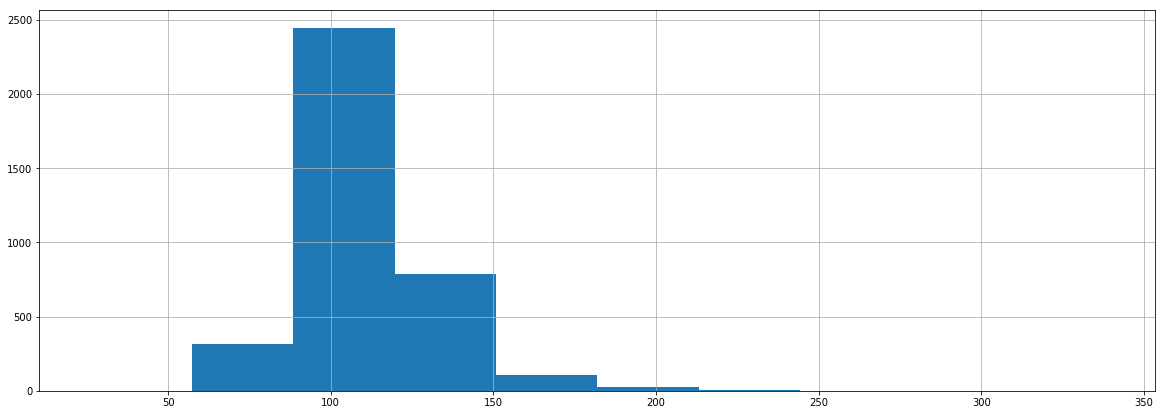

In [53]:
df_hr.runtime.hist(figsize=(20,7))

movies between 90 to 150 minutes have higher revenues

### Research Question 3  Is there any relationship between budget and revenue?
#### Does spending more on a movie makes you gain more?

in this analysis we will use budget_adj and revenue_adj to have a fair comparison.

Text(0.5,1,'Budget adjacent and Revenue adjacent Relationship')

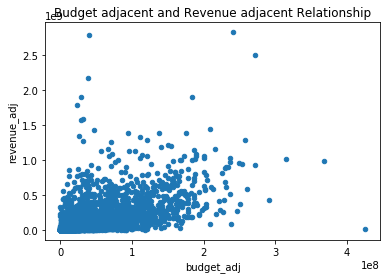

In [48]:
df.plot(x='budget_adj' , y='revenue_adj', kind='scatter')
plt.title("Budget adjacent and Revenue adjacent Relationship")

It looks like spending much on a movie doesn't nessecary means having a high revenue.

###### what if we compared using the non-afj columns

Text(0.5,1,'Budget and Revenue Relationship')

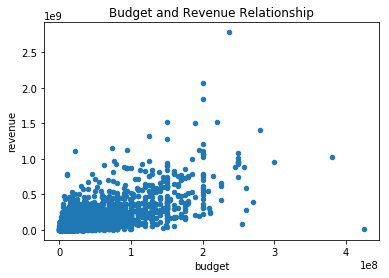

In [49]:
df.plot(x='budget' , y='revenue', kind='scatter')
plt.title('Budget and Revenue Relationship')

almost the same rusult and it has a little psitive correlation.

### Research Question 4  Are there key words for the movies with the most profit?
#### first we need to creat a profit column which is (revenue - budget)
accessing lists in columns source: https://stackoverflow.com/questions/45983017/extracting-an-element-of-a-list-in-a-pandas-column

Eliminating data under a given percentile: https://stackoverflow.com/questions/18580461/eliminating-all-data-over-a-given-percentile

In [77]:
df['profit'] = df.iloc[: , [2, 3]].sum(axis=1)

In [89]:
df_prof=df[df.profit > df.profit.quantile(.98)]

i wanted to take the top 75% but it took too much processing the code so i changed it to 98% to make the time shorter. but for better results we should take the top 75 percentile.

In [91]:
df_prof.shape

(74, 18)

In [92]:
df_prof.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris, Pratt, Bryce, Dallas, Howard, Irrfan, ...",Colin Trevorrow,"[monster, dna, tyrannosaurus, rex, velocirapto...",124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.663529e+09


In [124]:
keyword_dic={}

In [125]:
for i in  range(75):
    for keyword in df_prof['keywords'].str[i]:
        if keyword not in keyword_dic:
            keyword_dic[keyword]=1
        else:
            keyword_dic[keyword]+=1

removing nan from dictionary keys
source: https://stackoverflow.com/questions/24068306/is-there-a-way-to-remove-nan-from-a-dictionary-filled-with-data

In [159]:
from math import isnan

In [160]:
clean_dict = filter(lambda k: not isnan(k), keyword_dic)

In [161]:
clean_dict = {k: keyword_dic[k] for k in keyword_dic if type(k) is str}

In [176]:
max_value = max(clean_dict, key=clean_dict.get)
print(max_value)

comic


In [177]:
clean_dict['comic']

16

how to get all the keys for a certain value in a dictionary source: https://stackoverflow.com/questions/44664247/python-dictionary-how-to-get-all-keys-with-specific-values

In [187]:
[k for k,v in clean_dict.items() if float(v) >= 6]

['car',
 'marvel',
 'witch',
 'based',
 'elves',
 'secret',
 'comic',
 'of',
 'on',
 'the',
 'orcs',
 'sequel',
 'novel',
 'magic',
 'middle-earth',
 '(tolkien)']

#### we can see that the result confirms with the previous that the most keywords used are for adventure and si-fi mvies.

### Research Question 5  Does the run time of a movie affects it's popularity?

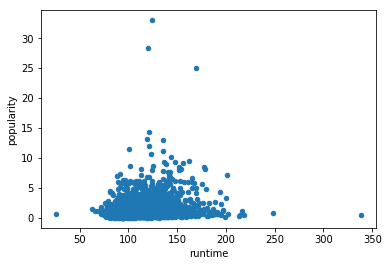

In [188]:
df.plot(x='runtime', y='popularity', kind='scatter');

it looks like average movies of 120 minutes are the most popular.

<a id='conclusions'></a>
## Conclusions

For sure further analysis for this data could be done with the proper amount of data.
my conclusion for this data set that it matches the real life situation as the comic and action movies are very popular these days as we can see there are a huge base for Marvel and DC fans as well as lord of the rings and star wars.
we can see that very from the analysis as in the past few years the trening for the si-fi movies are very high.

### Limitation
1.The data on older Movies were not that accurate

2.The method of providing the the budget_adj and revenue_adj were not clear.

3.It could be more helpful it there was a good review coulum and a bad review column.

4.It could be more helpul if there was a history for the votes of each movie to see if certain movies (and their properties) gained popularity through time.

5.there is a trending way of analysing the movie, it is the main color of the movies. for example the new Batman movie has main colors of red, orange and black. from which we can know if people nowadays prefer darker movies.

6.we can add a column to see if the movie have a plot twist or not.

7.we can add a colums to see if the movie is based on a true story and/or based on scientific facts.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [191]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0